# Installing/Importing libraries

If not installed yet, run the following cell:

In [3]:
# !pip install sklearn
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install mlxtend

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn as skl
import seaborn as sns
import mlxtend

# Importing and preprocessing data

## Importing dataset

Data from "https://www.kaggle.com/datasets/denkuznetz/housing-prices-regression" is initially imported.

In [5]:
ds = pd.read_csv("real_estate_dataset.csv") #ds stands for dataset
ds.head(3)

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,1,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,2,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,3,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880


First the column names will be changed so the data set is easily displayed.

In [6]:
ds.columns = ['ID', 'SqFeet', 'NBedrms', 'NBathrms', 'N_Flrs',
       'YrBuilt', 'Garden', 'Pool', 'GrgeSz', 'LocScr',
       'DistToCntr', 'Price']
ds.head(3)

,ID,SqFeet,NBedrms,NBathrms,N_Flrs,YrBuilt,Garden,Pool,GrgeSz,LocScr,DistToCntr,Price
0,1,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,2,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,3,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880


Lets look for missing data before analyzing it.

In [7]:
ds.isnull().any().to_numpy().any()

False

So it seems there is no missing data in the dataset.

## Anlyzing the kind of data

Lets then analyze the kind of data we're managing:

In [8]:
ds.sample()

,ID,SqFeet,NBedrms,NBathrms,N_Flrs,YrBuilt,Garden,Pool,GrgeSz,LocScr,DistToCntr,Price
39,40,160.038123,4,2,3,1956,1,1,12,6.900966,13.577955,690863.198892


So the data set is composed of the following kind of data:
- ID $\rightarrow$ house identifier. This do not have an impact on predictions, then will be removed in the next step.

##### **Features**
**Numerical**
- SqFeet $\rightarrow$ size of the house in square feet.
- NBedrms $\rightarrow$ number of bedrooms. 
- NBathrms $\rightarrow$ number of bathrooms.
- N_Flrs $\rightarrow$ number of floors.
- YrBuilt $\rightarrow$ year whenit was built.
- GrgeSz $\rightarrow$ garage size in square feet.
- LocScr $\rightarrow$ house location score from 0 to 10 depending on things weather, criminality, etc. 
- DistToCntr $\rightarrow$ Distance to the center (in km).

**Categorical**
- Garden $\rightarrow$ if it does or not have a garden.
- Pool $\rightarrow$ if it does or not have a pool.

##### **Numerical Target**
- Price $\rightarrow$ cost of the house.

As said above, ID has no impact on predictions, then it is removed:

In [9]:
ds = ds.drop(columns=["ID"])
ds.sample()

,SqFeet,NBedrms,NBathrms,N_Flrs,YrBuilt,Garden,Pool,GrgeSz,LocScr,DistToCntr,Price
411,287.515492,3,3,1,1909,0,1,44,4.93501,5.307402,689922.946156


As said above, we have two categorical features: Garden and Pool. Nevertheless this have just been encoded into a 0/1 numerical variable, where 1 stands for  "yes" and 0 for "no". So no categorical variable preprocessing will be needed.

## Statistical analysis of the data

In [10]:
ds.describe().iloc[[1,2,3,7],:]

,SqFeet,NBedrms,NBathrms,N_Flrs,YrBuilt,Garden,Pool,GrgeSz,LocScr,DistToCntr,Price
mean,174.640428,2.958000,1.976000,1.964000,1957.604000,0.536000,0.492000,30.174000,5.164410,10.469641,582209.629529
std,74.672102,1.440968,0.820225,0.802491,35.491781,0.499202,0.500437,11.582575,2.853489,5.588197,122273.390345
min,51.265396,1.000000,1.000000,1.000000,1900.000000,0.000000,0.000000,10.000000,0.004428,0.062818,276892.470136
max,298.241199,5.000000,3.000000,3.000000,2022.000000,1.000000,1.000000,49.000000,9.995439,19.927966,960678.274291


Text(0.5, 1.0, 'Correlation heatmap')

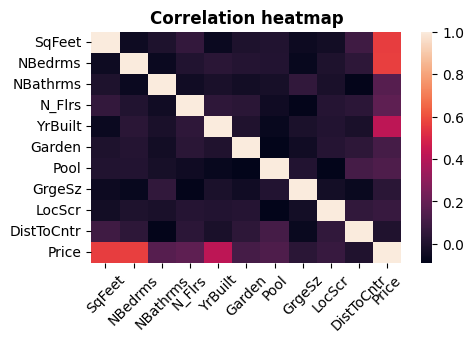

In [11]:
plt.close()
plt.figure(figsize=(5,3))
sns.heatmap(ds.corr())
plt.tick_params(axis="x", rotation=45)
plt.title("Correlation heatmap", weight="bold")

From the heatmap plotted above we see that:
- There doesn't seem to be a strong correlation between the features.
- The features with a higher correlation to the response ("price") are, in descending order NBedrms, NBedrms and YrBuilt (with a correlation higher than 0.4).       

In [12]:
ds.corr().sort_values(by="Price", ascending=False)

,SqFeet,NBedrms,NBathrms,N_Flrs,YrBuilt,Garden,Pool,GrgeSz,LocScr,DistToCntr,Price
Price,0.558604,0.563973,0.156689,0.177435,0.418293,0.109196,0.136579,0.032100,0.071326,0.000730,1.000000
NBedrms,-0.049918,1.000000,-0.056808,0.009088,0.031806,0.017429,0.012039,-0.065481,-0.000357,0.040511,0.563973
SqFeet,1.000000,-0.049918,-0.001667,0.056873,-0.055062,-0.000978,0.007530,-0.051598,-0.035270,0.093080,0.558604
YrBuilt,-0.055062,0.031806,-0.013407,0.046922,1.000000,0.000693,-0.065056,-0.008105,0.009614,-0.015113,0.418293
N_Flrs,0.056873,0.009088,-0.040895,1.000000,0.046922,0.033256,-0.045630,-0.082763,0.019928,0.035164,0.177435
NBathrms,-0.001667,-0.056808,1.000000,-0.040895,-0.013407,-0.037040,-0.024880,0.055707,-0.013855,-0.082571,0.156689
Pool,0.007530,0.012039,-0.024880,-0.045630,-0.065056,-0.087085,1.000000,0.011477,-0.088722,0.110382,0.136579
Garden,-0.000978,0.017429,-0.037040,0.033256,0.000693,1.000000,-0.087085,-0.037998,0.019130,0.040305,0.109196
LocScr,-0.035270,-0.000357,-0.013855,0.019928,0.009614,0.019130,-0.088722,-0.029939,1.000000,0.054446,0.071326
GrgeSz,-0.051598,-0.065481,0.055707,-0.082763,-0.008105,-0.037998,0.011477,1.000000,-0.029939,-0.061407,0.032100


### Categorical variables inspection

To ease the analysis, lets use here a new dataframe:

In [13]:
ds_ = ds.copy(deep=False)
col_nms = ["Garden", "Pool"]
for key in col_nms:
    ds_[key] = [("Yes" if val==1 else "No") for val in ds_[key]] 
ds_.sample()

,SqFeet,NBedrms,NBathrms,N_Flrs,YrBuilt,Garden,Pool,GrgeSz,LocScr,DistToCntr,Price
115,267.865148,3,2,3,1943,No,No,33,9.54847,3.173577,654928.118359


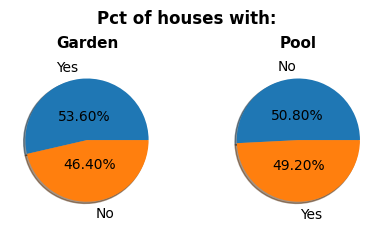

In [14]:
plt.close()
col_nms = ["Garden", "Pool"]

ncols_ =2 
fig, ax = plt.subplots(ncols=ncols_, figsize=(5,2))
for ax_i in range(ncols_):
    col_name = col_nms[ax_i]
    vals = ds_[col_name].value_counts()
    ax[ax_i].pie(vals.values,
                 labels=vals.index,
                 labeldistance=1.2,
                 autopct="%.2f%%",
                 pctdistance=0.4,
                 shadow=True)
    ax[ax_i].set_title(col_name, weight="bold", fontsize=11, y=1.05)

fig.suptitle("Pct of houses with:", weight="bold", y=1.15)
plt.show()

So the set of observations is diversed in this two categorical variables, as both classes are almost equally represented. 

Lets also see the histogram of prices for each feature class:

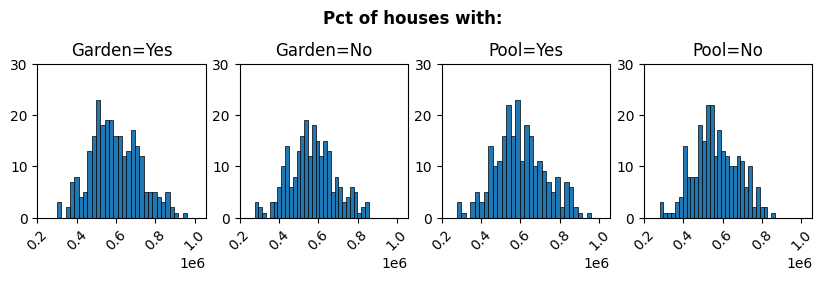

In [15]:
plt.close()
col_nms = ["Garden", "Pool"]
ncols_ = 4 
fig, ax = plt.subplots(ncols=ncols_, figsize=(10,2))
ax_i = 0
for name in col_nms:
    for n in ["Yes", "No"]:
        price = ds_[ds_[name]==n]["Price"]
        ax[ax_i].hist(price,
                      edgecolor="black",
                      linewidth=0.5,
                      bins=30)
        ax[ax_i].tick_params(axis="x", rotation=45)
        ax[ax_i].set_title(f"{name}={n}")
        ax[ax_i].set_xlim(0.9*min(ds_["Price"]), 1.1*max(ds_["Price"]))
        ax[ax_i].set_ylim(0,30)
        ax[ax_i].set_xticks([i*1e6 for i in np.linspace(0.2,1,5)])
        ax_i+=1

fig.suptitle("Pct of houses with:", weight="bold", y=1.15)
plt.show()

So from the plot above we see that those houses with garden or pool can at most cost more than those without any of them. But more or less, from 0.2 to 0.85 million dollars there are the same amount of houses for each price range.

#### Is there any correlation between having a garden and a pool?

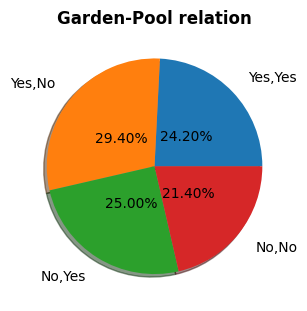

In [16]:
yn = ["Yes", "No"]
responses = [[i,j] for i in yn for j in yn]
subsets = [ds_[(ds_["Garden"]==i)&(ds_["Pool"]==j)] for i,j in responses]

plt.close()
plt.figure(figsize=(4,3.5))
labels_ = [f"{i},{j}" for i,j in responses]
plt.pie([len(x) for x in subsets],
        labels=labels_,
        labeldistance=1.2,
        autopct="%.2f%%",
        pctdistance=0.4,
        shadow=True)
plt.title("Garden-Pool relation", weight="bold")
plt.show()

So from this set, as each cathegory has almost the same pct, it seems that those houses with a garden do not strictily seem to have also a pool and vice-versa.

### Numerical variable inspection

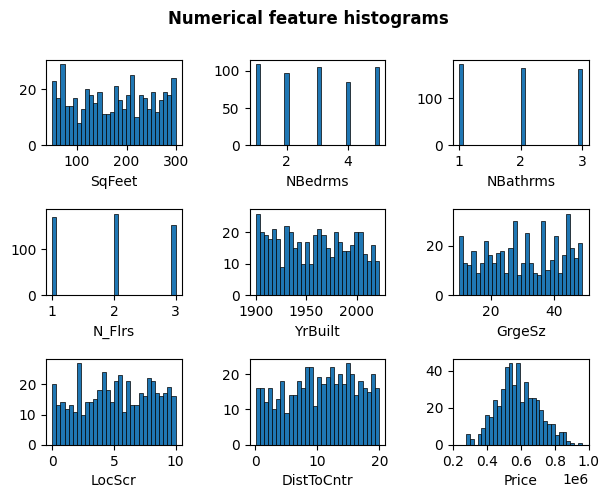

In [17]:
num_cols = ['SqFeet', 'NBedrms', 'NBathrms', 'N_Flrs', 'YrBuilt', 'GrgeSz', 'LocScr', 'DistToCntr', 'Price'] #Names for the numerical features
ncols_ = 3
nrows_ = 3
plt.close()
fig,ax = plt.subplots(ncols=ncols_, nrows=nrows_, figsize=(7,5))
col_index = 0
for ax_i,ax_j in [[i,j] for i in range(nrows_) for j in range(ncols_)]:
    col_name = num_cols[col_index]
    ax[ax_i, ax_j].hist(ds[col_name],
                        edgecolor="black",
                        linewidth=0.5,
                        bins=30)
    ax[ax_i, ax_j].set_xlabel(col_name)
    if col_name=="Price":
        ax[ax_i, ax_j].set_xticks([i*1e6 for i in np.linspace(0.2, 1.0, 5)])
    col_index+=1
fig.suptitle("Numerical feature histograms", weight="bold")
fig.subplots_adjust(hspace=.75, wspace=0.5)
plt.show()

Again, more or less, the sample seems to be very diverse in its predictors, as the histograms do not seem to concentrate in any region.

**Nevertheless** price as a distribution clearly different from those of the predictors, as price's histogram shows a mean price from which the number of houses tend to decrease as the price decreases or increases.  

### Scatter plots and emerging trends

Lets make now the scatterplots to look for any possible trend between the features:

Text(0.5, 1.0, 'Matrix scatter plot')

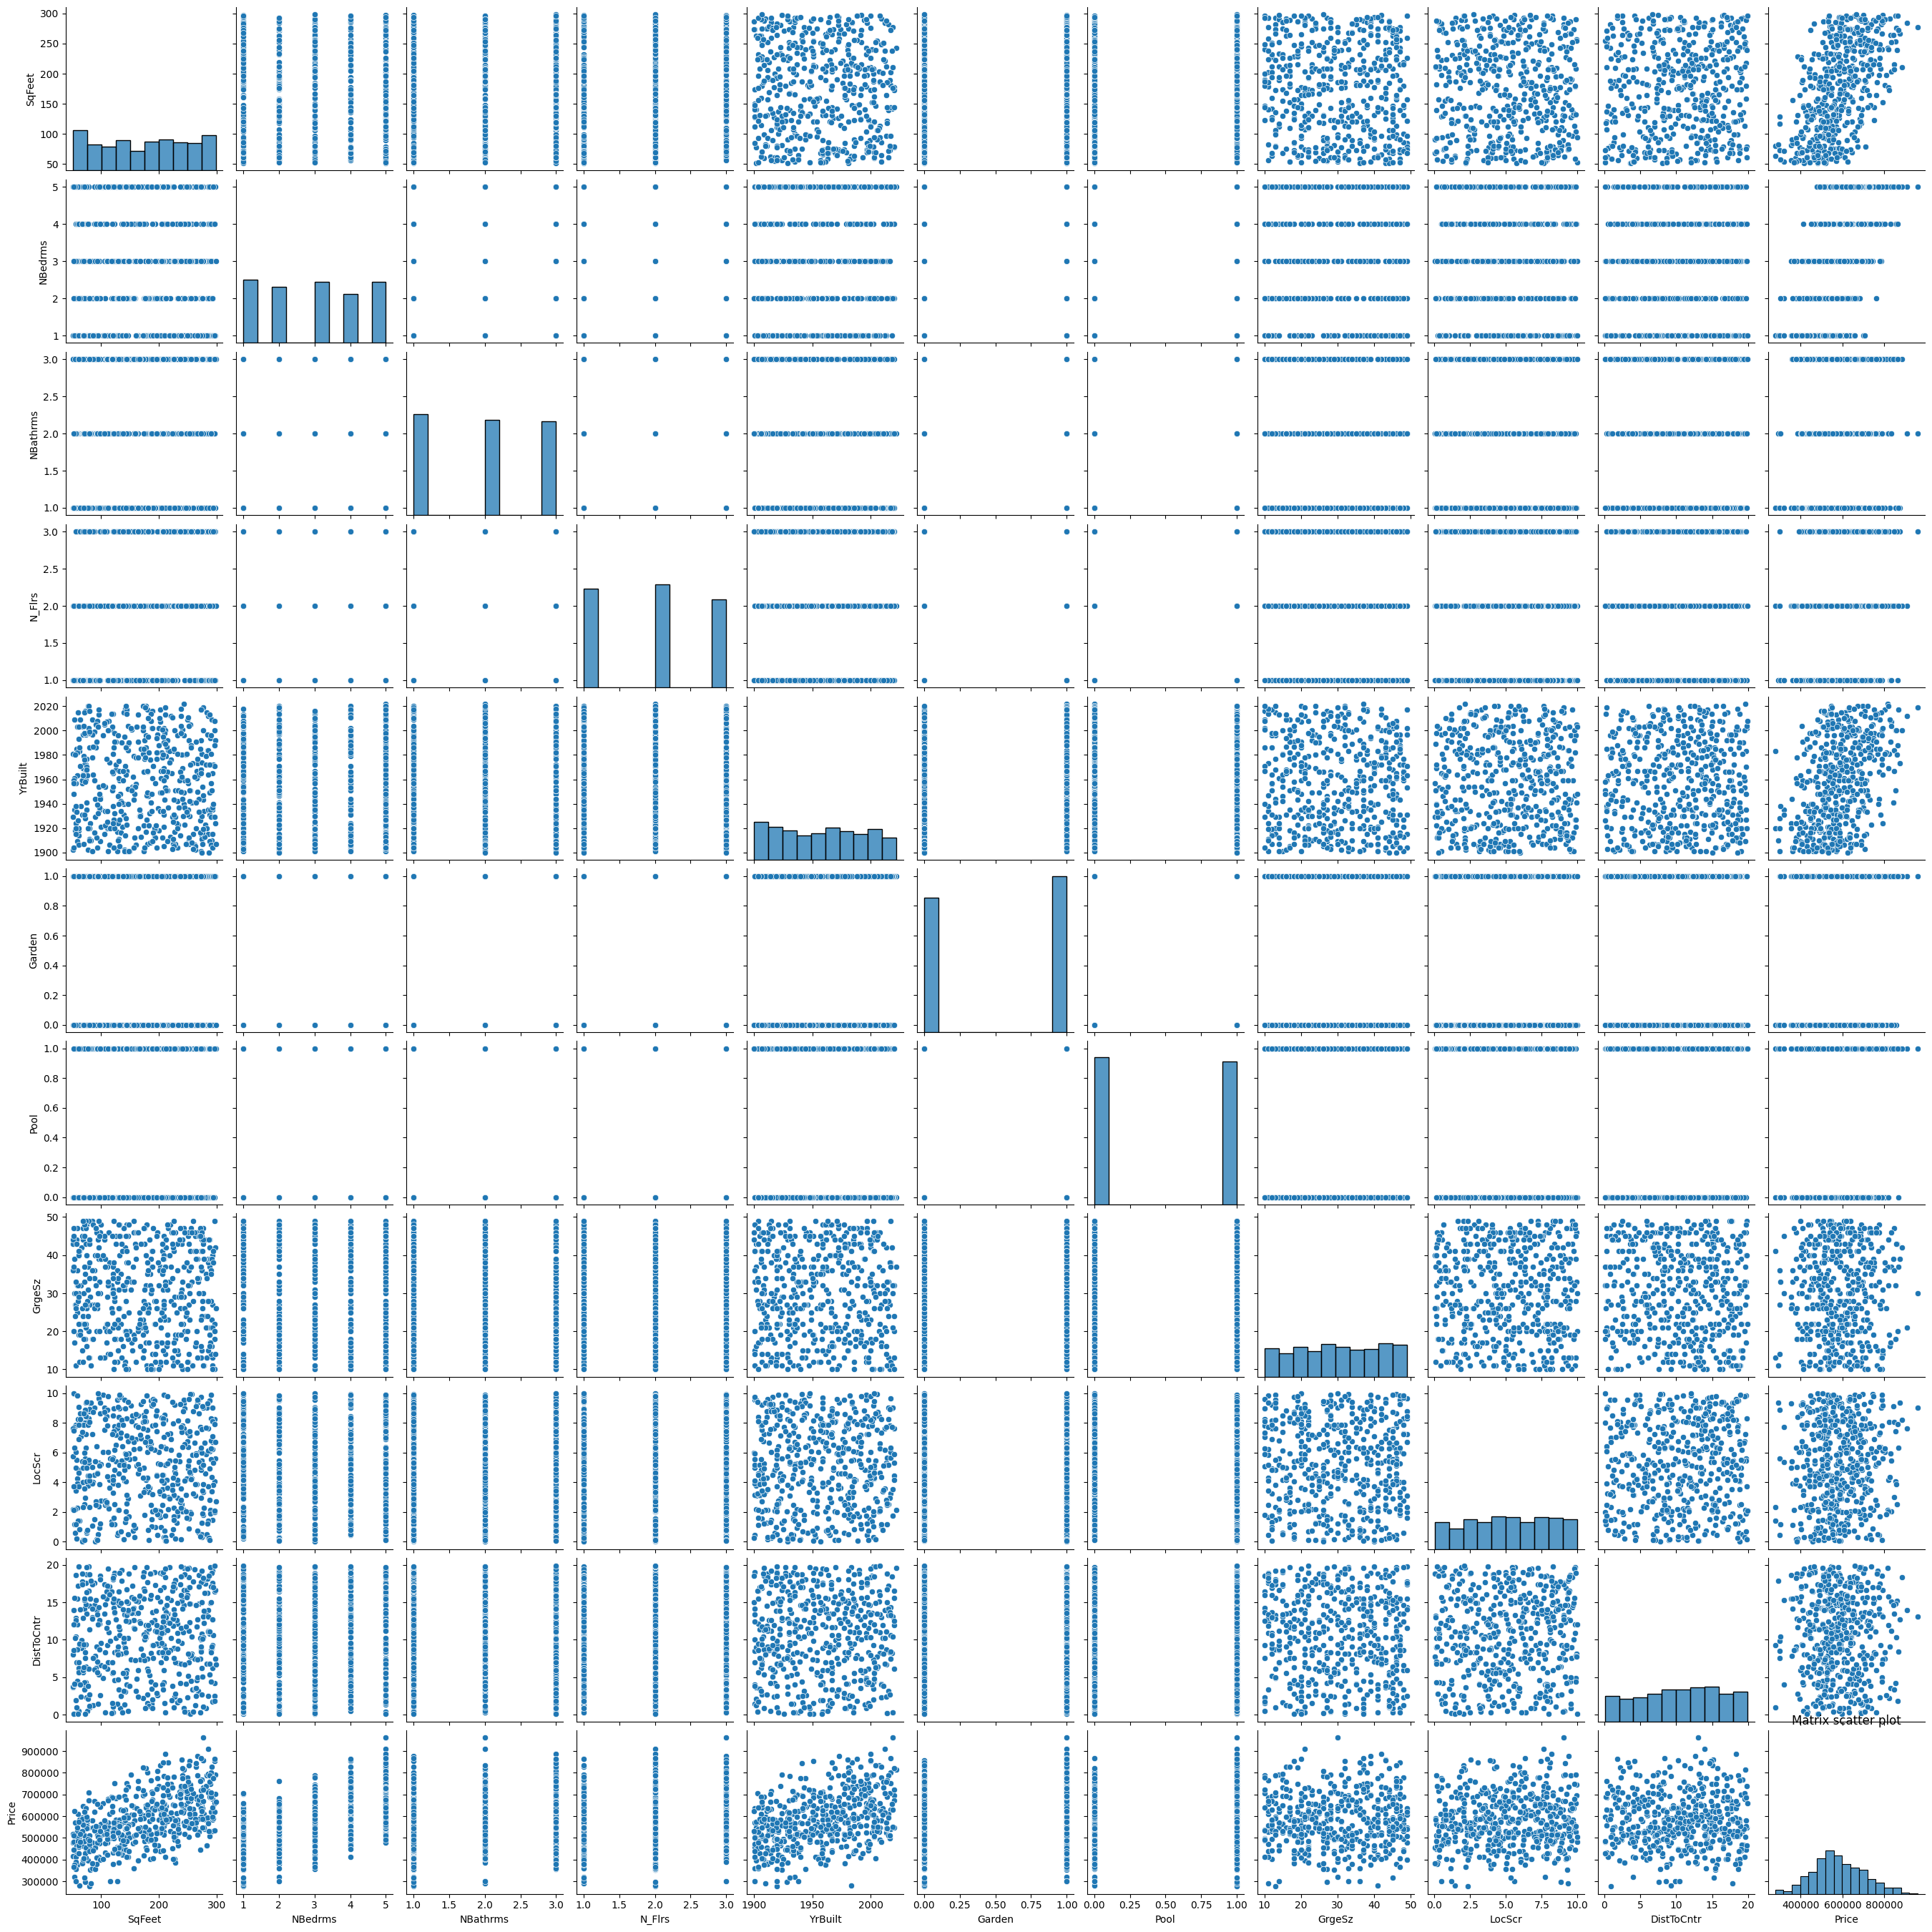

In [18]:
sns.pairplot(ds)
plt.title("Matrix scatter plot")

The scatter plots between features show that there does not seem to be correlation between features, as, a priori, there is no trend between any pair of features. 

However, some of the scatter plots between a feature and the response ("Price") seem to follow a trend. Lets inspect them more closely:


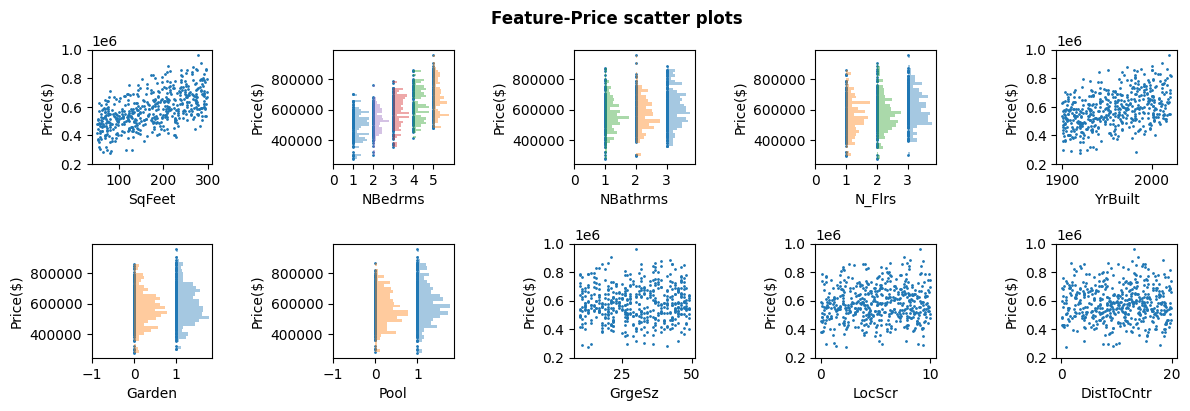

In [19]:
X = ds.iloc[:,:-1].values   #500x10 numpy array containing the features
y = ds.iloc[:,-1].values    #500x1 numpy array containing the responses
n_feat = len(X[0])
feat_names = ds.columns[:n_feat]

ncols_ = 5
nrows_ = 2

plt.close()
fig,ax = plt.subplots(ncols=ncols_, nrows=nrows_, figsize=(14,4))
feat_i = 0
for ax_i, ax_j in [[i,j] for i in range(nrows_) for j in range(ncols_)]:
    ax[ax_i,ax_j].scatter(X[:,feat_i],
                       y,
                       s=1)
    ax[ax_i,ax_j].set_ylabel("Price($)")
    ax[ax_i,ax_j].set_yticks([i*1e6 for i in np.linspace(0.2,1,5)])
    feat_name = feat_names[feat_i]
    ax[ax_i,ax_j].set_xlabel(feat_name)

    if feat_name in ["NBedrms","NBathrms", "N_Flrs","Garden", "Pool"]:
        unique_vals = ds[feat_name].unique()
        for val in unique_vals:
            sub_price = ds[ds[feat_name]==val]["Price"]
            nbins_ = 30
            weights_ = np.ones_like(sub_price)/(1.3*max(np.histogram(sub_price, bins=nbins_)[0]))
            ax[ax_i,ax_j].hist(sub_price, 
                               orientation="horizontal",
                               bins=30,
                               weights=weights_,
                               bottom=val,
                               alpha=0.4)
        ax[ax_i,ax_j].set_xticks(np.arange(min(unique_vals)-1, max(unique_vals)+1))

    feat_i+=1

fig.suptitle("Feature-Price scatter plots", weight="bold")
fig.subplots_adjust(wspace=1, hspace=.7)
plt.show()

From the plot located above we may initially infer that:
- SqFeet, YrBuilt, Nbedrms and NBathrms seem to be related to the price of the house, as the bigger this values, the higher the price of the house. As the relation seem to be linear at first we'll assume that's the case, until plotting the residuals plot, where we can prove it.

- As said before, those houses with a garden or a pool can at most cost more than those whithout any of both.

# Model training

First lets divide the 500 observations into a train and a test. 

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

Now we'll train four models applying different techniques to see which performs better in the test set.

## Forward selection

### Model Training

In [21]:
from sklearn.metrics import mean_squared_error
def adjusted_r2(estimator, X, y):
    y_pred = estimator.predict(X)
    RSS = np.sum((y-y_pred)**2)
    TSS = np.sum((np.mean(y)-y)**2)
    r2 = 1-RSS/TSS
    n=len(X)
    p=len(X[0])
    return 1-(1-r2)*(n-1)/(n-p-1)

In [22]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
sfs = SequentialFeatureSelector(estimator=lr,
                                k_features=(1,len(X[0])),
                                forward=True,
                                scoring=adjusted_r2,
                                cv=5,
                                n_jobs=-1)
sfs.fit(X_train, y_train)

,estimator,LinearRegression()
,k_features,"(1, ...)"
,forward,True
,floating,False
,verbose,0
,scoring,<function adj...0025A1364B1A0>
,cv,5
,n_jobs,-1
,pre_dispatch,'2*n_jobs'
,clone_estimator,True
,fixed_features,None


In [23]:
keys = ['feature_idx', 'avg_score']# 'cv_scores',  'cv_scores',
v=[]
subsets = list(sfs.subsets_.values())
for i in range(len(subsets)):
    v.append([subsets[i][key] for key in keys])
ss_df = pd.DataFrame(columns=keys, data=v)  #ss_df stands for subset dataframe
ss_df["feature_idx"] = [list(x) for x in ss_df["feature_idx"]]
ss_df["feature_idx"] = [[feat_names[i] for i in x]  for x in ss_df["feature_idx"]]
pd.set_option("display.max_colwidth", None)
ss_df.style.set_properties(**{'text-align': 'center'})
pd.set_option("display.precision", 5)
ss_df

,feature_idx,avg_score
0,[SqFeet],0.30740
1,"[SqFeet, NBedrms]",0.62957
2,"[SqFeet, NBedrms, YrBuilt]",0.82924
3,"[SqFeet, NBedrms, NBathrms, YrBuilt]",0.86706
4,"[SqFeet, NBedrms, NBathrms, YrBuilt, Pool]",0.89625
5,"[SqFeet, NBedrms, NBathrms, YrBuilt, Garden, Pool]",0.91457
6,"[SqFeet, NBedrms, NBathrms, N_Flrs, YrBuilt, Garden, Pool]",0.93045
7,"[SqFeet, NBedrms, NBathrms, N_Flrs, YrBuilt, Garden, Pool, GrgeSz]",0.94498
8,"[SqFeet, NBedrms, NBathrms, N_Flrs, YrBuilt, Garden, Pool, GrgeSz, LocScr]",0.95757
9,"[SqFeet, NBedrms, NBathrms, N_Flrs, YrBuilt, Garden, Pool, GrgeSz, LocScr, DistToCntr]",0.96737


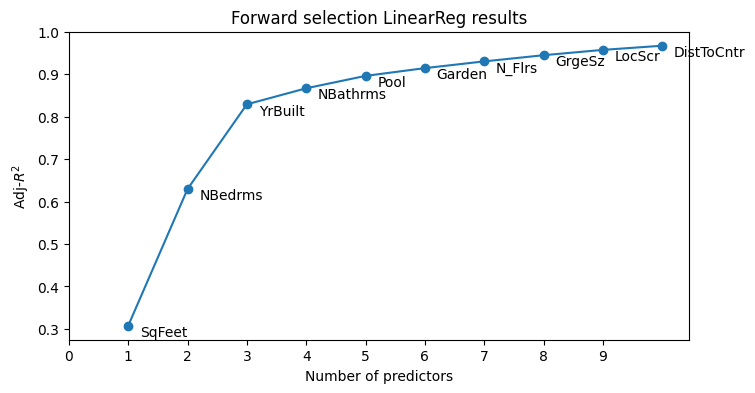

In [24]:
plt.close()
plt.figure(figsize=(8,4))
x_grid = np.arange(len(ss_df))
plt.plot(x_grid+1, ss_df["avg_score"], marker="o")
named = []
for x in x_grid:
    new_feat = [str(x) for x in ss_df["feature_idx"][x] if x not in named][0]
    plt.annotate(text=new_feat,
                 xy=(x+1.2,ss_df["avg_score"][x]-0.025))
    named.append(new_feat)
plt.xticks(x_grid)
plt.xlabel("Number of predictors")
plt.ylabel("Adj-$R^2$")
plt.title("Forward selection LinearReg results")
plt.show()

Then every feature seems to improves model performance. 

In [25]:
import statsmodels.api as sm
X_ = sm.add_constant(X_train[:,sfs.k_feature_idx_])
modelo = sm.OLS(y_train, X_).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     1496.
Date:                Wed, 20 Aug 2025   Prob (F-statistic):          2.08e-303
Time:                        11:21:36   Log-Likelihood:                -4509.1
No. Observations:                 400   AIC:                             9040.
Df Residuals:                     389   BIC:                             9084.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.882e+06   5.46e+04    -52.826      0.000   -2.99e+06   -2.77e+06
x1          1021.2719     13.001     78.551      0.000     995.710    1046.834
x2          5.079e+04    689.476     73.669      0.000    4.94e+04    5.21e+04
x3          2.946e+04   1179.452     24.980      0.000    2.71e+04    3.18e+04
x4          2.082e+04   1219.883     17.068      0.000    1.84e+04    2.32e+04
x5          1510.4649     27.672     54.584      0.000    1456.059    1564.870
x6          3.196e+04   1951.934     16.373      0.000    2.81e+04    3.58e+04
x7          4.778e+04   1954.511     24.446      0.000    4.39e+04    5.16e+04
x8          1155.6231     84.264     13.714      0.000     989.952    1321.294
x9          4701.9225    338.063     13.908      0.000    4037.264    5366.581
x10        -1980.7369    172.299    -11.496      0.000   -2319.491   -1641.983
==============================================================================
Omnibus:                        0.749   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.688   Jarque-Bera (JB):                0.811
Skew:                          -0.102   Prob(JB):                        0.667
Kurtosis:                       2.914   Cond. No.                     1.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model testing

In [26]:
from sklearn.metrics import r2_score
lr.fit(X_train[:,sfs.k_feature_idx_], y_train)
y_pred = lr.predict(X_test[:,sfs.k_feature_idx_])
print(f"Multiple linear regression with all the predictors gives a test score of {r2_score(y_test,y_pred):0.6f}")

Multiple linear regression with all the predictors gives a test score of 0.979902


## Lasso regression

### Model training

First features should be standarized.

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_X_train = sc.fit_transform(X_train)
sc_X_test = sc.fit_transform(X_test)

In [61]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV


gscv = GridSearchCV(estimator=Lasso(),
                    param_grid={"alpha":[10*i for i in range(30)]},
                    cv=5,
                    scoring=adjusted_r2,
                    n_jobs=-1)
gscv.fit(sc_X_train,y_train)
pd.DataFrame(gscv.cv_results_)[['param_alpha', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by="rank_test_score").head()

,param_alpha,mean_test_score,std_test_score,rank_test_score
20,200,0.96741,0.00899,1
19,190,0.96741,0.00900,2
21,210,0.96741,0.00897,3
18,180,0.96741,0.00902,4
22,220,0.96741,0.00896,5


Then the best choice seems to be approximatelly alpha=200.

In [62]:
lassoReg = Lasso(alpha=200)
lassoReg.fit(sc_X_train,y_train)
y_pred = lassoReg.predict(sc_X_test)
r2_score(y_test, y_pred)

0.9779764629060551